In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Clean tables

In [68]:
hotel_num = 'hotel_3'

table_names = ['search_log_session', 'search_log', 'booking_data', 'search_log_room', 'search_log_room_offer','search_log_room_child', 'upsell_data', 'daily_occupancy', 'website_daily_users','datepicker_daily_visitors']

for x in table_names:
    globals()[x] = pd.read_csv('./../data-raw/'+hotel_num+'/'+x+'_'+hotel_num+'.csv', sep=';', encoding='ISO-8859-1')

## search_log_session table

In [69]:
search_log_session.tail()

,id,uuid,session_id,utm_source,utm_medium,utm_campaign
13043,29076,1886060082.1729285658,1729285711,hirlevel_s2,ct,hirlevel_c6
13044,29077,1586093179.1729285523,1729285715,google,cpc,(not set)
13045,29078,970729882.1729285726,1729285767,google,cpc,(not set)
13046,29079,1646288791.1729281306,1729286124,facebook,cpc,campaign_1
13047,29424,357970273.1729286470,1729288746,(direct),(none),(not set)


In [70]:
# Define conditions
#conditions = [
#    search_log_session['utm_medium'].str.contains('none')]

# Define corresponding categories
#choices = ['direct', 'instagram', 'google', 'bing', 'na']

In [71]:
search_log_session['utm_medium'].fillna('nan', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_57066/3715441772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log_session['utm_medium'].fillna('nan', inplace=True)


In [72]:
search_log_session['utm_medium'].value_counts()

utm_medium
cpc         8423
organic     1704
(none)      1693
nan          633
referral     376
ct           170
offline       24
email         22
paid           2
teszt          1
Name: count, dtype: int64

In [73]:
# Define new categories for 'utm_medium':
search_log_session.loc[search_log_session['utm_medium'].str.contains('email'), 'utm_medium'] = 'email'
search_log_session.loc[search_log_session['utm_medium'].str.contains('post'), 'utm_medium'] = 'post'
search_log_session.loc[search_log_session['utm_medium'].str.contains('offline'), 'utm_medium'] = 'offline'
search_log_session.loc[search_log_session['utm_medium'].str.contains('teszt|paid'), 'utm_medium'] = 'other'
search_log_session.loc[search_log_session['utm_medium'].str.contains('ct'), 'utm_medium'] = 'ct'
search_log_session.loc[search_log_session['utm_medium'].str.contains('nan'), 'utm_medium'] = '(not set)'

In [74]:
search_log_session['utm_medium'].value_counts()

utm_medium
cpc          8423
organic      1704
(none)       1693
(not set)     633
referral      376
ct            170
offline        24
email          22
other           3
Name: count, dtype: int64

In [75]:
search_log_session['hotel_id'] = hotel_num    # add hotel_id variable

In [76]:
search_log_session.head()

,id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id
0,4255,1534019404.1726608826,1726610240,NaN,(not set),(not set),hotel_3
1,4257,1544215904.1725304369,1726613742,google,organic,(not set),hotel_3
2,4258,2122792873.1726614284,1726614307,google,cpc,(not set),hotel_3
3,4259,85389975.1726614091,1726614366,google,cpc,(not set),hotel_3
4,4260,85389975.1726614091,1726618263,google,cpc,(not set),hotel_3


In [77]:
# Export the cleaned table
search_log_session.to_csv('./../data-clean/'+hotel_num+'/search_log_session.csv', mode='x')

## search_log

In [107]:
search_log.head()

,id,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,total_price_final
0,129533,4255,2024-09-17 22:13:49,hu,HUF,2024-10-26,2024-10-29,4,3,1,1,NaN,NaN
1,129534,4255,2024-09-17 22:15:04,hu,HUF,2024-12-30,2025-01-01,3,2,1,0,NaN,NaN
2,129535,4257,2024-09-17 22:55:42,en,EUR,2024-10-30,2024-11-02,4,3,2,1,NaN,NaN
3,129536,4257,2024-09-17 22:57:04,en,EUR,2024-10-30,2024-11-02,4,3,2,0,NaN,NaN
4,129537,4257,2024-09-17 22:57:37,en,EUR,2024-10-30,2024-11-02,4,3,2,0,NaN,NaN


In [108]:
search_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21662 non-null  int64  
 1   search_log_session_id  21662 non-null  int64  
 2   utc_datetime           21662 non-null  object 
 3   lang_code              21662 non-null  object 
 4   currency               21662 non-null  object 
 5   arrival                21662 non-null  object 
 6   departure              21662 non-null  object 
 7   days                   21662 non-null  int64  
 8   nights                 21662 non-null  int64  
 9   adults                 21662 non-null  int64  
 10  children               21662 non-null  int64  
 11  conversion             664 non-null    float64
 12  total_price_final      664 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


In [109]:
search_log['days'].value_counts()

days
3     10557
4      6144
2      2286
5      1873
6       358
8       162
7       129
1        59
13       21
9        17
11       13
12       10
15       10
10        9
16        3
28        2
14        2
38        1
30        1
43        1
34        1
19        1
31        1
17        1
Name: count, dtype: int64

In [110]:
# remove outlier rows (where stay parameters are extremes, that are not relevant for this analysis)
search_log.drop(search_log[search_log['days'] > 10].index, inplace=True)

In [111]:
search_log['adults'].value_counts()

adults
2     18273
3       985
4       949
1       918
6       184
5       173
8        48
7        30
10       19
9        14
13        1
Name: count, dtype: int64

In [112]:
search_log.drop(search_log[search_log['adults'] > 6].index, inplace=True)

In [113]:
search_log['conversion'].fillna(0, inplace=True) # replace NaNs to 0, where is no conversion

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/232601709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log['conversion'].fillna(0, inplace=True) # replace NaNs to 0, where is no conversion


In [114]:
search_log['total_price_final'].fillna(0, inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/3524563653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  search_log['total_price_final'].fillna(0, inplace=True)


In [115]:
search_log['hotel_id'] = hotel_num    # add hotel_id variable
search_log.head()

,id,search_log_session_id,utc_datetime,lang_code,currency,arrival,departure,days,nights,adults,children,conversion,total_price_final,hotel_id
0,129533,4255,2024-09-17 22:13:49,hu,HUF,2024-10-26,2024-10-29,4,3,1,1,0.0,0.0,hotel_3
1,129534,4255,2024-09-17 22:15:04,hu,HUF,2024-12-30,2025-01-01,3,2,1,0,0.0,0.0,hotel_3
2,129535,4257,2024-09-17 22:55:42,en,EUR,2024-10-30,2024-11-02,4,3,2,1,0.0,0.0,hotel_3
3,129536,4257,2024-09-17 22:57:04,en,EUR,2024-10-30,2024-11-02,4,3,2,0,0.0,0.0,hotel_3
4,129537,4257,2024-09-17 22:57:37,en,EUR,2024-10-30,2024-11-02,4,3,2,0,0.0,0.0,hotel_3


In [116]:
# Export the cleaned table
search_log.to_csv('./../data-clean/'+hotel_num+'/search_log.csv', mode='x')

## search_log_room

In [101]:
search_log_room

,id,search_log_id,adults,children,picked_room,picked_price,picked_room.1
0,5755,129533,1,1,NaN,NaN,NaN
1,5756,129534,1,0,NaN,NaN,NaN
2,5757,129535,2,1,NaN,NaN,NaN
3,5758,129536,2,0,NaN,NaN,NaN
4,5759,129537,2,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23980,41857,163179,2,2,NaN,NaN,NaN
23981,41858,163180,2,2,NaN,NaN,NaN
23982,42203,163525,2,2,NaN,NaN,NaN
23983,42204,163526,2,2,NaN,NaN,NaN


In [102]:
search_log_room.drop(columns='picked_room', axis=1, inplace=True) # drop the first picked_room column, as only the second matters

In [103]:
search_log_room.drop(index=search_log_room[search_log_room['children'] > 3].index, inplace=True) # remove where children > 3

In [104]:
search_log_room.rename(columns={'picked_room.1': 'picked_room'}, inplace=True) # rename the column name

In [105]:
search_log_room['hotel_id'] = hotel_num    # add hotel_id variable
search_log_room.head()

,id,search_log_id,adults,children,picked_price,picked_room,hotel_id
0,5755,129533,1,1,NaN,NaN,hotel_3
1,5756,129534,1,0,NaN,NaN,hotel_3
2,5757,129535,2,1,NaN,NaN,hotel_3
3,5758,129536,2,0,NaN,NaN,hotel_3
4,5759,129537,2,0,NaN,NaN,hotel_3


In [106]:
# Export the cleaned table
search_log_room.to_csv('./../data-clean/'+hotel_num+'/search_log_room.csv', mode='x')

## search_log_room_child

In [120]:
search_log_room_child.head()

,id,search_log_room_id,age,baby_bed
0,1220,5755,10,0
1,1221,5757,13,0
2,1222,5769,4,0
3,1223,5770,6,0
4,1224,5771,6,0


In [121]:
search_log_room_child['hotel_id'] = hotel_num    # add hotel_id variable
search_log_room_child.head()

,id,search_log_room_id,age,baby_bed,hotel_id
0,1220,5755,10,0,hotel_3
1,1221,5757,13,0,hotel_3
2,1222,5769,4,0,hotel_3
3,1223,5770,6,0,hotel_3
4,1224,5771,6,0,hotel_3


In [122]:
# Export the cleaned table
search_log_room_child.to_csv('./../data-clean/'+hotel_num+'/search_log_room_child.csv', mode='x')

## search_log_room_offer

In [188]:
search_log_room_offer

,id,search_log_id,search_log_room_id,room_code,room_price_min,room_price_max
0,14956,129533,5755,ROOMCC,197982.0,197982.0
1,14957,129533,5755,ROOMBB,172278.0,172278.0
2,14958,129533,5755,ROOMGG,401778.0,401778.0
3,14959,129534,5756,ROOMCC,266526.0,266526.0
4,14960,129534,5756,ROOMBB,231948.0,231948.0
...,...,...,...,...,...,...
104207,168664,163178,41856,ROOMEE,176256.0,176256.0
104208,168665,163179,41857,ROOMGG,173366.0,187728.0
104209,168666,163179,41857,ROOMFF,197802.0,212918.0
104210,168667,163180,41858,ROOMGG,215490.0,215490.0


In [189]:
search_log_room_offer[search_log_room_offer["room_price_min"] > 1500000]

,id,search_log_id,search_log_room_id,room_code,room_price_min,room_price_max
971,15955,129735,5968,ROOMCC,1749600.0,1963728.0
972,15956,129735,5968,ROOMBB,1522260.0,1709748.0
973,15957,129735,5968,ROOMAA,1749600.0,1963728.0
974,15958,129735,5968,ROOMFF,3044520.0,3410496.0
975,15959,129735,5968,ROOMDD,2129220.0,2387844.0
976,15960,129735,5968,ROOMEE,2740770.0,3071142.0
16276,39423,134680,11222,ROOMGG,1681632.0,2111040.0
16277,39424,134680,11222,ROOMEE,1728288.0,2169360.0
16614,41270,135089,11636,ROOMGG,1834439.0,1834439.0
16615,41271,135089,11636,ROOMAA,1624890.0,1624890.0


In [190]:
search_log_room_offer['hotel_id'] = hotel_num    # add hotel_id variable
search_log_room_offer.head()

,id,search_log_id,search_log_room_id,room_code,room_price_min,room_price_max,hotel_id
0,14956,129533,5755,ROOMCC,197982.0,197982.0,hotel_3
1,14957,129533,5755,ROOMBB,172278.0,172278.0,hotel_3
2,14958,129533,5755,ROOMGG,401778.0,401778.0,hotel_3
3,14959,129534,5756,ROOMCC,266526.0,266526.0,hotel_3
4,14960,129534,5756,ROOMBB,231948.0,231948.0,hotel_3


In [191]:
# Export the cleaned table
search_log_room_offer.to_csv('./../data-clean/'+hotel_num+'/search_log_room_offer.csv', mode='x')

## upsell_data

In [123]:
upsell_data['hotel_id'] = hotel_num    # add hotel_id variable
upsell_data.head()

,search_log_id,upsell_type,name,unit_price,pieces,sum_price,hotel_id
0,129894,12,MEDI40_EN,37.8,2,75.6,hotel_3
1,130637,12,MEDI40_HU,13600.0,1,13600.0,hotel_3
2,132560,13,SUMCSOB90_DE,55.3,1,55.3,hotel_3
3,132895,2,PROS_HU,10990.0,1,10990.0,hotel_3
4,132895,9,NONABAR_HU,8990.0,1,8990.0,hotel_3


In [124]:
# Export the cleaned table
upsell_data.to_csv('./../data-clean/'+hotel_num+'/upsell_data.csv', mode='x')

## booking_data

In [126]:
booking_data['hotel_id'] = hotel_num    # add hotel_id variable
booking_data.head()

,search_log_id,total_price_final,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total,hotel_id
0,129649,82653.2,112607.20,0.0,0,11260.00,18694.0,hotel_3
1,129640,161892.0,185435.56,0.0,0,18543.56,5000.0,hotel_3
2,129730,85117.0,122352.22,0.0,0,12235.22,25000.0,hotel_3
3,129772,1700.0,141700.00,0.0,140000,0.00,0.0,hotel_3
4,129888,177358.0,197064.44,0.0,0,19706.44,0.0,hotel_3


In [127]:
# Export the cleaned table
booking_data.to_csv('./../data-clean/'+hotel_num+'/booking_data.csv', mode='x')

## daily_occupancy

In [128]:
daily_occupancy['hotel_id'] = hotel_num    # add hotel_id variable
daily_occupancy.head()

,recording_date,subject_date,fill_rate,hotel_id
0,2024-09-18,2024-09-18,94.737,hotel_3
1,2024-09-18,2024-09-19,85.088,hotel_3
2,2024-09-18,2024-09-20,98.246,hotel_3
3,2024-09-18,2024-09-21,81.579,hotel_3
4,2024-09-18,2024-09-22,62.281,hotel_3


In [129]:
# Export the cleaned table
daily_occupancy.to_csv('./../data-clean/'+hotel_num+'/daily_occupancy.csv', mode='x')

## datepicker_daily_visitors

In [109]:
# separate utm medium and source
datepicker_daily_visitors[['utm_source','utm_medium']] = datepicker_daily_visitors['utm_source_and_medium'].str.split(' / ', n=1, expand=True)

In [110]:
# "referral" typically indicates traffic coming from external websites that link to your site, but aren’t search engines or paid ads
# Examples: Links from blogs, online reviews, media articles, directories, and other third-party websites.

def replace_missing(utm_medium, utm_campaign):
    if (utm_medium == None) & (utm_campaign == '(referral)'):
        return 'referral'
    elif (utm_medium == None) & ('hirlevel' in utm_campaign):
        return 'newsletter'
    elif (utm_medium == None) & (utm_campaign == '(not set)'):
        return '(not set)'
    else:
        return utm_medium

datepicker_daily_visitors['utm_medium'] = datepicker_daily_visitors[['utm_medium','utm_campaign']].apply(lambda row: replace_missing(row['utm_medium'], row['utm_campaign']), axis=1)

In [111]:
datepicker_daily_visitors.drop(columns='utm_source_and_medium', inplace=True)

In [112]:
# reduce the number of categories
#group categories: 
#    facebook
#    instagram
#    msn
#    google

datepicker_daily_visitors.loc[datepicker_daily_visitors['utm_source'].str.contains('facebook'), 'utm_source'] = 'facebook'
datepicker_daily_visitors.loc[datepicker_daily_visitors['utm_source'].str.contains('instagram'), 'utm_source'] = 'instagram'
datepicker_daily_visitors.loc[datepicker_daily_visitors['utm_source'].str.contains('msn'), 'utm_source'] = 'msn'
datepicker_daily_visitors.loc[datepicker_daily_visitors['utm_source'].str.contains('google'), 'utm_source'] = 'google'

In [113]:
datepicker_daily_visitors['utm_medium'].isna().sum()

0

In [114]:
datepicker_daily_visitors.dropna(subset='utm_medium', inplace=True, ignore_index=True)

In [115]:
datepicker_daily_visitors.loc[datepicker_daily_visitors['utm_medium'] == '(none)', 'utm_medium'] = '(not set)'

In [116]:
datepicker_daily_visitors.loc[datepicker_daily_visitors['utm_campaign'] == '(not+set)', 'utm_campaign'] = '(not set)'

In [117]:
# rearrange columns
datepicker_daily_visitors = datepicker_daily_visitors[['date', 'utm_campaign', 'utm_source','utm_medium','user_count', 'session_count']]

In [118]:
datepicker_daily_visitors['hotel_id'] = hotel_num    # add hotel_id variable
datepicker_daily_visitors.head()

,date,utm_campaign,utm_source,utm_medium,user_count,session_count,hotel_id
0,2024-09-18,(organic),google,cpc,75,80,hotel_3
1,2024-09-18,(direct),(direct),(not set),73,76,hotel_3
2,2024-09-18,HU | GSN | PERF I Brand,google,cpc,45,52,hotel_3
3,2024-09-18,(organic),google,organic,37,42,hotel_3
4,2024-09-18,HU | pMAX | PERF I Brand,google,cpc,34,36,hotel_3


In [119]:
# Export the cleaned table
datepicker_daily_visitors.to_csv('./../data-clean/'+hotel_num+'/datepicker_daily_visitors.csv', mode='x')

In [135]:
#datepicker_daily_visitors.rename(columns={'Dátum':'date', 'Felhasználók teljes száma':'total_users', 'Munkamenetek': 'num_of_sessions'}, inplace=True) # rename the columns

In [136]:
# map Hungarian month codes to numbers
#month_map = {
#    'jan.': '01', 'febr.': '02', 'márc.': '03', 'ápr.': '04', 'máj.': '05', 'jún.': '06',
#    'júl.': '07', 'aug.': '08', 'szept.': '09', 'okt.': '10', 'nov.': '11', 'dec.': '12'
#}

# Replace Hungarian month names with numbers
#for hun_month, num_month in month_map.items():
#    datepicker_daily_visitors['date'] = datepicker_daily_visitors['date'].str.replace(hun_month, num_month+'.', regex=True)

# strip spaces
#datepicker_daily_visitors['date'].str.replace(' ', '')
# convert to 'YYYY-MM-DD' format
#datepicker_daily_visitors['date'] = pd.to_datetime(datepicker_daily_visitors['date'], format='%Y. %m. %d.').dt.strftime('%Y-%m-%d')


In [137]:
datepicker_daily_visitors['hotel_id'] = hotel_num    # add hotel_id variable
datepicker_daily_visitors.head()

,date,total_users,num_of_sessions,hotel_id
0,2024-09-18,385,421,hotel_3
1,2024-09-19,425,472,hotel_3
2,2024-09-20,298,319,hotel_3
3,2024-09-21,307,350,hotel_3
4,2024-09-22,368,393,hotel_3


In [138]:
# Export the cleaned table
datepicker_daily_visitors.to_csv('./../data-clean/'+hotel_num+'/datepicker_daily_visitors.csv', mode='x')

## Read rest of the tables

In [4]:
table_names = ['daily_ppc_budget']

for x in table_names:
    globals()[x] = pd.read_csv('./../data-raw/'+hotel_num+'/'+x+'_'+hotel_num+'.csv', sep=',')

## daily_ppc_budget

In [131]:
daily_ppc_budget.rename(columns={'Unnamed: 0':'date'}, inplace=True) # rename the columns

In [132]:
from datetime import datetime
# convert the date format to YYYY-MM-DD
daily_ppc_budget['date'] = pd.to_datetime(daily_ppc_budget['date'], format='%Y.%m.%d.').dt.strftime('%Y-%m-%d')

In [133]:
daily_ppc_budget['hotel_id'] = hotel_num    # add hotel_id variable
daily_ppc_budget.head()

,date,daily_google_spend,daily_microsoft_spend,daily_meta_spend,hotel_id
0,2024-09-18,103187,13076,28788,hotel_3
1,2024-09-19,105303,19576,64102,hotel_3
2,2024-09-20,104991,20604,73873,hotel_3
3,2024-09-21,98337,12220,27476,hotel_3
4,2024-09-22,113580,13024,36343,hotel_3


In [134]:
# Export the cleaned table
daily_ppc_budget.to_csv('./../data-clean/'+hotel_num+'/daily_ppc_budget.csv', mode='x')

## website_daily_users

<Axes: xlabel='user_count', ylabel='session_count'>

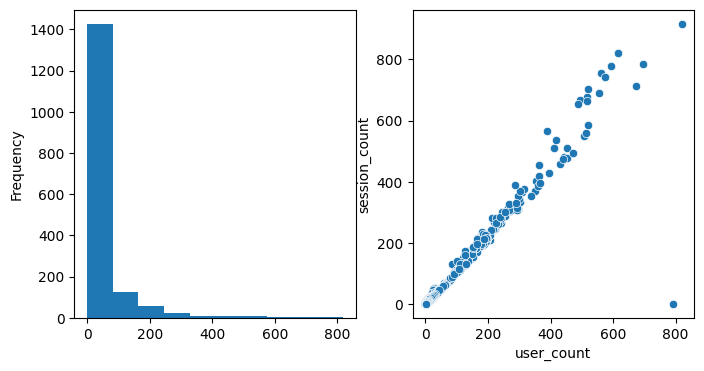

In [139]:
# check the fault outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
website_daily_users['user_count'].plot(ax=ax1, kind='hist')
sns.scatterplot(ax=ax2, data=website_daily_users, x='user_count', y='session_count')

In [140]:
# drop the potentially false outlier
website_daily_users.drop(index= website_daily_users[website_daily_users['user_count'] == 791].index, inplace=True)

<Axes: xlabel='user_count', ylabel='session_count'>

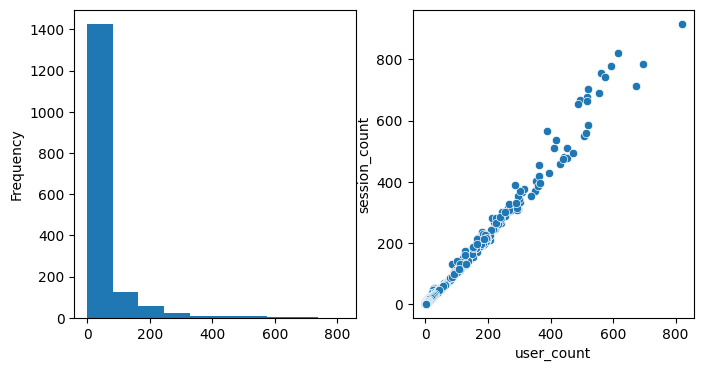

In [141]:
# check the fault outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
website_daily_users['user_count'].plot(ax=ax1, kind='hist')
sns.scatterplot(ax=ax2, data=website_daily_users, x='user_count', y='session_count')

In [142]:
# separate utm medium and source
website_daily_users[['utm_source','utm_medium']] = website_daily_users['utm_source_and_medium'].str.split(' / ', n=1, expand=True)

In [143]:
# "referral" typically indicates traffic coming from external websites that link to your site, but aren’t search engines or paid ads
# Examples: Links from blogs, online reviews, media articles, directories, and other third-party websites.

def replace_missing(utm_medium, utm_campaign):
    if (utm_medium == None) & (utm_campaign == '(referral)'):
        return 'referral'
    elif (utm_medium == None) & ('hirlevel' in utm_campaign):
        return 'newsletter'
    elif (utm_medium == None) & (utm_campaign == '(not set)'):
        return '(not set)'
    else:
        return utm_medium

website_daily_users['utm_medium'] = website_daily_users[['utm_medium','utm_campaign']].apply(lambda row: replace_missing(row['utm_medium'], row['utm_campaign']), axis=1)

In [144]:
website_daily_users.drop(columns='utm_source_and_medium', inplace=True)

<Axes: xlabel='utm_source'>

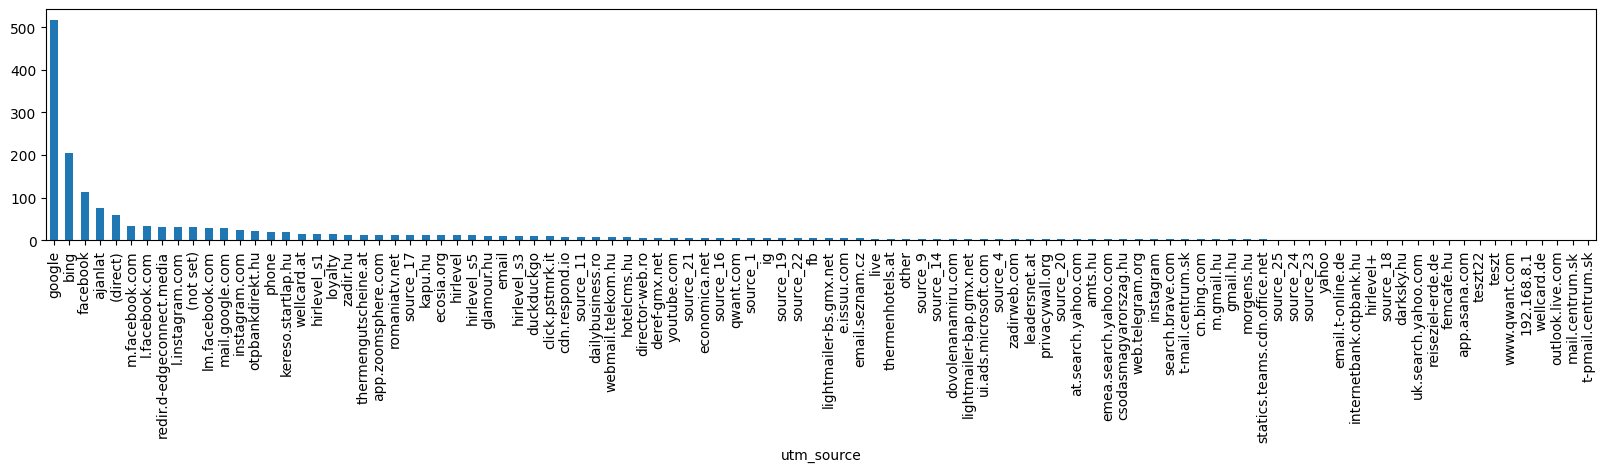

In [145]:
website_daily_users['utm_source'].value_counts().plot(kind='bar', figsize=(20,3))

In [146]:
# reduce the number of categories
#group categories: 
#    facebook
#    instagram
#    msn
#    google

website_daily_users.loc[website_daily_users['utm_source'].str.contains('facebook'), 'utm_source'] = 'facebook'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('instagram'), 'utm_source'] = 'instagram'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('msn'), 'utm_source'] = 'msn'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('google'), 'utm_source'] = 'google'

In [147]:
website_daily_users['utm_source'].value_counts()[:10]

utm_source
google                       545
facebook                     206
bing                         205
ajanlat                       76
(direct)                      58
instagram                     56
redir.d-edgeconnect.media     31
(not set)                     30
otpbankdirekt.hu              22
phone                         20
Name: count, dtype: int64

In [148]:
website_daily_users.dropna(subset='utm_medium', inplace=True, ignore_index=True)

In [149]:
website_daily_users.loc[website_daily_users['utm_campaign'] == '(not+set)', 'utm_campaign'] = '(not set)'

<Axes: xlabel='utm_campaign'>

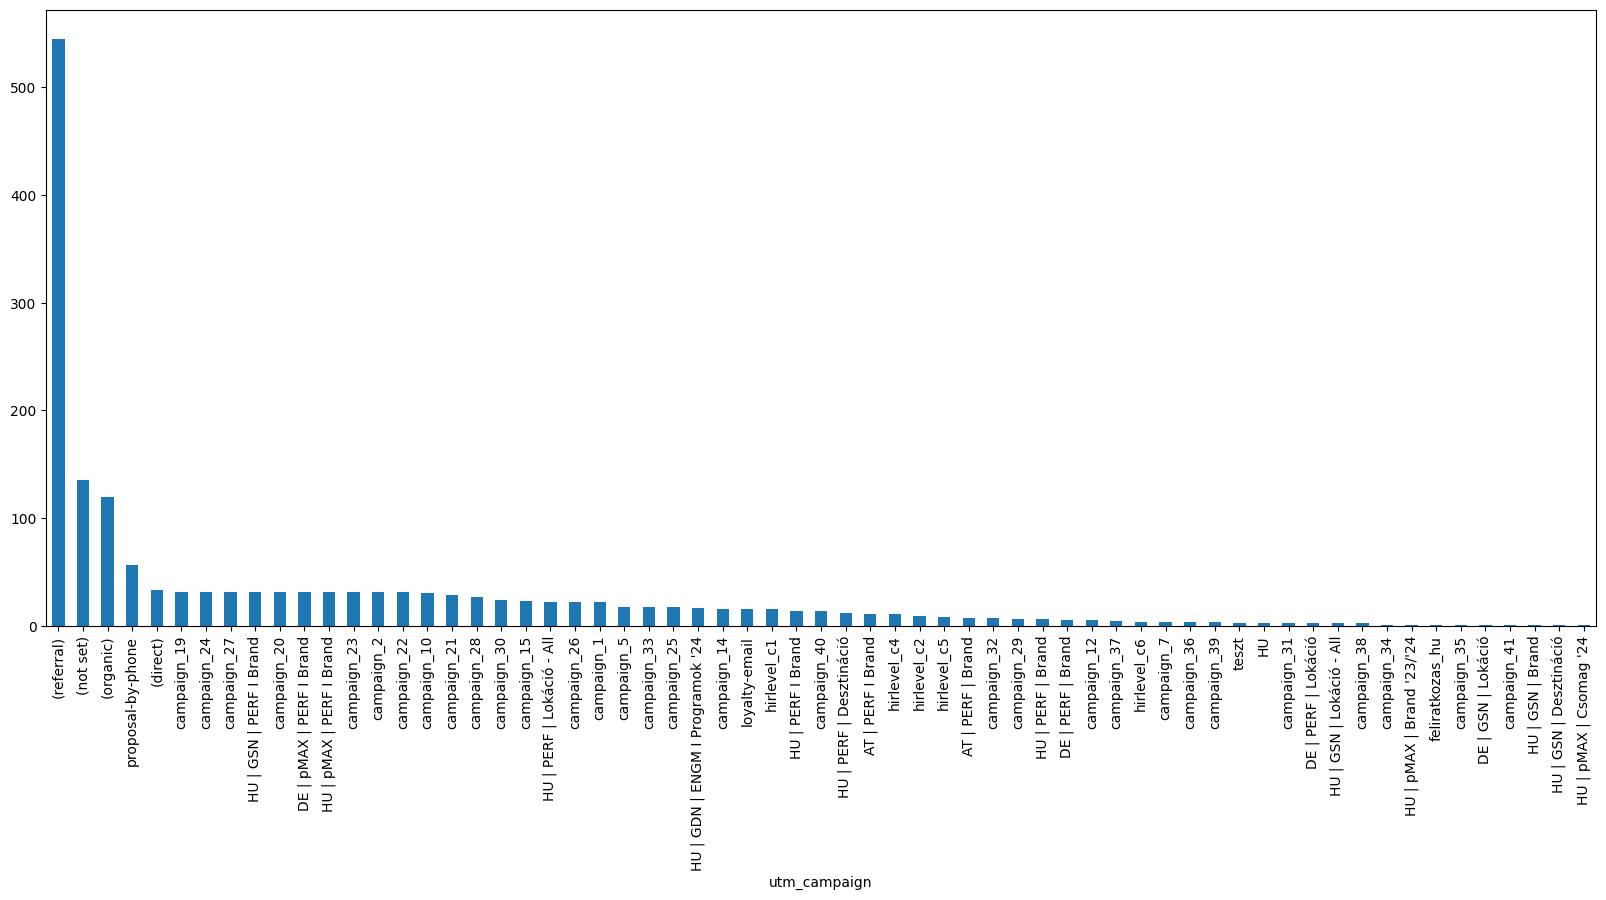

In [150]:
website_daily_users['utm_campaign'].value_counts().plot(kind='bar', figsize=(20,8))

In [151]:
# rearrange columns
website_daily_users = website_daily_users[['date','utm_source','utm_medium', 'utm_campaign', 'user_count', 'session_count']]

In [152]:
website_daily_users['hotel_id'] = hotel_num    # add hotel_id variable
website_daily_users.head()

,date,utm_source,utm_medium,utm_campaign,user_count,session_count,hotel_id
0,2024-09-18,(not set),(not set),(not set),516,676,hotel_3
1,2024-09-18,(direct),(none),(direct),227,260,hotel_3
2,2024-09-18,google,cpc,(organic),221,246,hotel_3
3,2024-09-18,google,cpc,HU | pMAX | PERF I Brand,172,187,hotel_3
4,2024-09-18,google,organic,(organic),153,180,hotel_3


In [153]:
# Export the cleaned table
website_daily_users.to_csv('./../data-clean/'+hotel_num+'/website_daily_users.csv', mode='x')

## website_daily_users for Hotel_2

In [68]:
website_daily_users = pd.read_csv('./../data-raw/'+hotel_num+'/website_daily_users_'+hotel_num+'.csv', sep=';', encoding='ISO-8859-1,')

In [69]:
website_daily_users

,date,utm_source_and_medium,utm_campaign,user_count,session_count
0,2024-09-18,(not set),(not set),425,551
1,2024-09-18,google / cpc,(organic),292,342
2,2024-09-18,google / cpc,(not set),206,232
3,2024-09-18,(direct) / (none),(direct),175,220
4,2024-09-18,google / organic,(organic),145,170
...,...,...,...,...,...
1621,2024-10-18,google / cpc,DE | GSN | PERF I Lokáció,1,1
1622,2024-10-18,hirlevel / ct,campaign_13,1,1
1623,2024-10-18,hirlevel_s3,hirlevel_c3,1,1
1624,2024-10-18,hirlevel / ct,hirlevel_c2,1,1


In [70]:
# separate utm medium and source
website_daily_users[['utm_source','utm_medium']] = website_daily_users['utm_source_and_medium'].str.split(' / ', n=1, expand=True)

In [71]:
# "referral" typically indicates traffic coming from external websites that link to your site, but aren’t search engines or paid ads
# Examples: Links from blogs, online reviews, media articles, directories, and other third-party websites.

def replace_missing(utm_medium, utm_campaign):
    if (utm_medium == None) & (utm_campaign == '(referral)'):
        return 'referral'
    elif (utm_medium == None) & ('hirlevel' in utm_campaign):
        return 'newsletter'
    elif (utm_medium == None) & (utm_campaign == '(not set)') | (utm_campaign == '(not+set)'):
        return '(not set)'
    else:
        return utm_medium

website_daily_users['utm_medium'] = website_daily_users[['utm_medium','utm_campaign']].apply(lambda row: replace_missing(row['utm_medium'], row['utm_campaign']), axis=1)

In [72]:
website_daily_users.drop(columns='utm_source_and_medium', inplace=True)

In [73]:
# reduce the number of categories
#group categories: 
#    facebook
#    instagram
#    msn
#    google
#    yahoo

website_daily_users.loc[website_daily_users['utm_source'].str.contains('facebook'), 'utm_source'] = 'facebook'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('instagram'), 'utm_source'] = 'instagram'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('msn'), 'utm_source'] = 'msn'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('google'), 'utm_source'] = 'google'
website_daily_users.loc[website_daily_users['utm_source'].str.contains('yahoo'), 'utm_source'] = 'yahoo'

<Axes: xlabel='utm_source'>

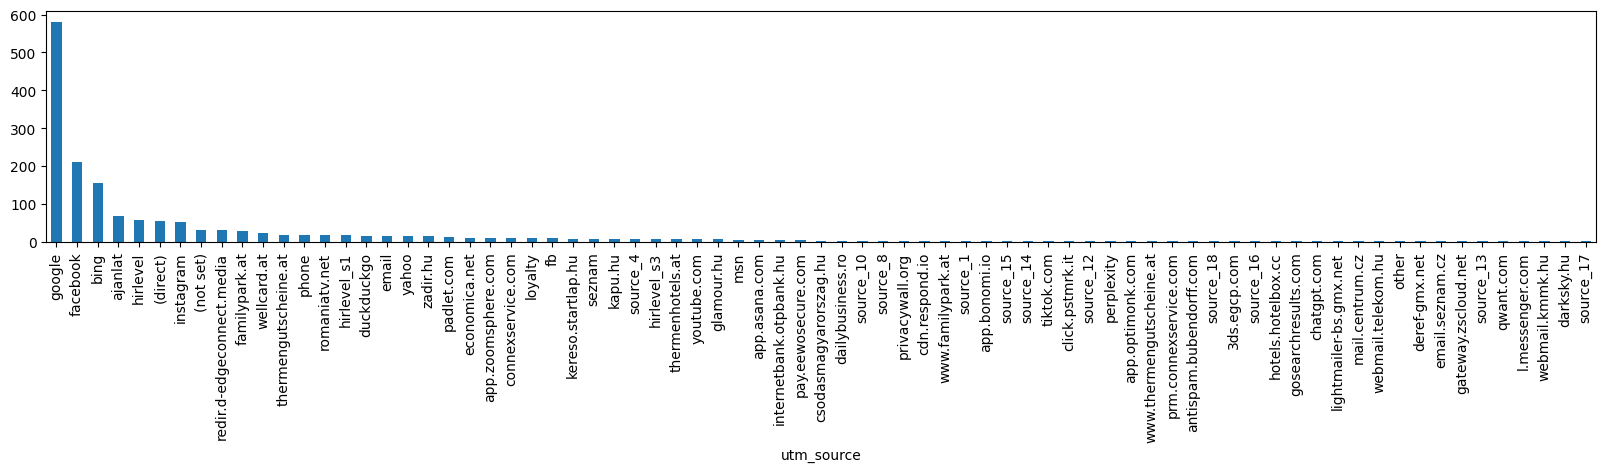

In [74]:
website_daily_users['utm_source'].value_counts().plot(kind='bar', figsize=(20,3))

In [75]:
website_daily_users.dropna(subset='utm_medium', inplace=True, ignore_index=True)

In [76]:
website_daily_users.loc[website_daily_users['utm_campaign'] == '(not+set)', 'utm_campaign'] = '(not set)'

<Axes: xlabel='utm_campaign'>

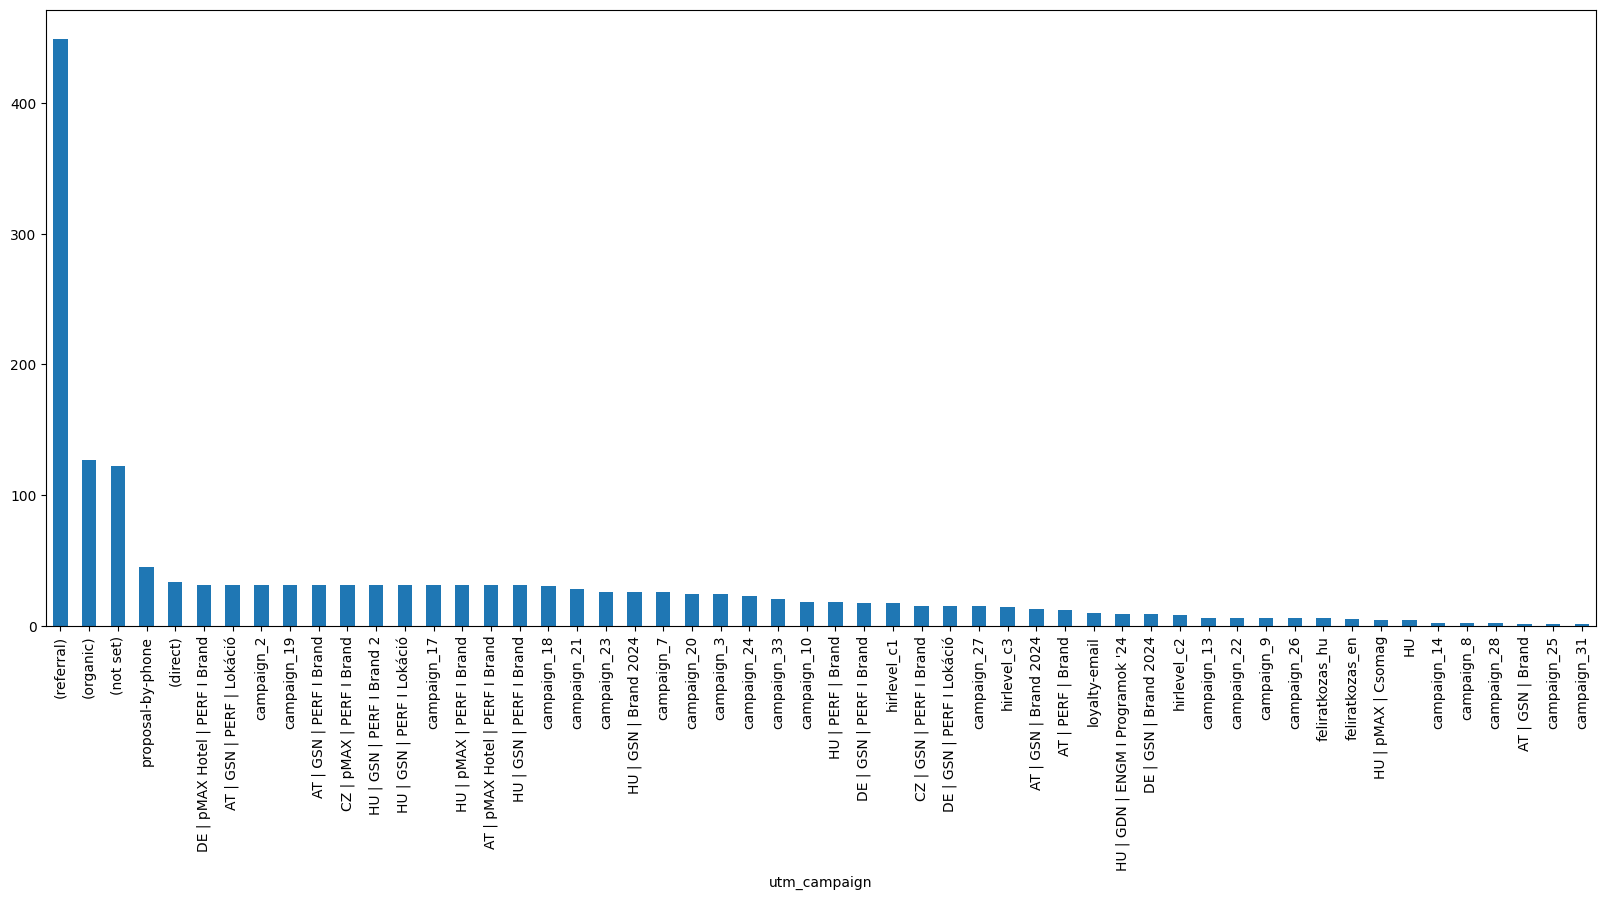

In [77]:
website_daily_users['utm_campaign'].value_counts().plot(kind='bar', figsize=(20,8))

In [78]:
# rearrange columns
website_daily_users = website_daily_users[['date','utm_source','utm_medium', 'utm_campaign', 'user_count', 'session_count']]

In [79]:
website_daily_users['hotel_id'] = hotel_num    # add hotel_id variable
website_daily_users.head()

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_11042/4039588559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website_daily_users['hotel_id'] = hotel_num    # add hotel_id variable


,date,utm_source,utm_medium,utm_campaign,user_count,session_count,hotel_id
0,2024-09-18,(not set),(not set),(not set),425,551,hotel_2
1,2024-09-18,google,cpc,(organic),292,342,hotel_2
2,2024-09-18,google,cpc,(not set),206,232,hotel_2
3,2024-09-18,(direct),(none),(direct),175,220,hotel_2
4,2024-09-18,google,organic,(organic),145,170,hotel_2


In [80]:
# Export the cleaned table
website_daily_users.to_csv('./../data-clean/'+hotel_num+'/website_daily_users.csv', mode='x')

# Concat the tables of different hotels

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [60]:
table_names = ['search_log_session', 'search_log', 'booking_data', 'search_log_room', 'search_log_room_offer','search_log_room_child', 'upsell_data', 'daily_occupancy', 'website_daily_users', 'daily_ppc_budget', 'datepicker_daily_visitors']

for k in table_names:
    globals()[k] = pd.DataFrame()
    for x in ['1','2','3']:
        actual_table = pd.read_csv('./../data-clean/hotel_'+x+'/'+k+'.csv', sep=',', encoding='ISO-8859-1', index_col='Unnamed: 0')
        globals()[k] = pd.concat([globals()[k], actual_table])

# Join tables for searches and bookings analysis

## transform tables from long to wide format:

search_log_room_child

In [61]:
search_log_room_child['count'] = search_log_room_child.groupby((search_log_room_child['search_log_room_id'] != search_log_room_child['search_log_room_id'].shift()).cumsum()).cumcount()

In [62]:
search_log_room_child = search_log_room_child.pivot(index=['search_log_room_id','hotel_id'], columns='count', values=['age', 'baby_bed'])
#search_log_room_child.pivot(index=['search_log_room_id','hotel_id'])

#search_log_room_child.pivot_table(index=['search_log_room_id','hotel_id'], columns="baby_bed", aggfunc='first')

In [63]:
search_log_room_child.columns = [(str(col[1])+'_'+col[0]) for col in search_log_room_child.columns]
search_log_room_child.head()

,,0_age,1_age,2_age,3_age,4_age,0_baby_bed,1_baby_bed,2_baby_bed,3_baby_bed,4_baby_bed
search_log_room_id,hotel_id,,,,,,,,,,
3839,hotel_2,14.0,12.0,7.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3841,hotel_2,1.0,1.0,3.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3842,hotel_2,6.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3843,hotel_2,6.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3844,hotel_2,9.0,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [64]:
search_log_room_child.reset_index(inplace=True)

In [65]:
search_log_room_child['baby_bed'] = search_log_room_child[['0_baby_bed', '1_baby_bed', '2_baby_bed', '3_baby_bed','4_baby_bed']].apply(lambda x: x.sum(), axis=1) # summarize the baby beds

In [66]:
search_log_room_child.drop(columns=['0_baby_bed', '1_baby_bed', '2_baby_bed', '3_baby_bed','4_baby_bed'], inplace=True)

In [67]:
search_log_room_child.sort_values(by=['hotel_id','search_log_room_id'], inplace=True)

search_log_room_offer

In [68]:
# 'search_log_room_offer' long to wide format
search_log_room_offer_w = search_log_room_offer.pivot(index=['search_log_room_id','hotel_id'], columns='room_code', values=['room_price_min','room_price_max'])
search_log_room_offer_w

room_price_min                                   \
room_code                           ROOMAA     ROOMBB     ROOMCC     ROOMDD   
search_log_room_id hotel_id                                                   
3782               hotel_2             NaN  395280.00  337680.00        NaN   
3824               hotel_2       113832.00        NaN        NaN  107712.00   
3837               hotel_2             NaN  328032.00        NaN        NaN   
3838               hotel_2             NaN     476.00        NaN        NaN   
3839               hotel_2             NaN        NaN        NaN        NaN   
...                                    ...        ...        ...        ...   
42655              hotel_1       208080.00  220320.00  183600.00        NaN   
42660              hotel_1       220320.00  232560.00  195840.00        NaN   
42661              hotel_1             NaN  295200.00  252000.00        NaN   
42662              hotel_1          692.58     742.05     593.64     643.11   
42663              hotel_1             NaN        NaN        NaN        NaN   

                                                                        \
room_code                       ROOMEE    ROOMFF     ROOMGG     ROOMHH   
search_log_room_id hotel_id                                              
3782               hotel_2         NaN  424080.0        NaN        NaN   
3824               hotel_2         NaN       NaN  119952.00        NaN   
3837               hotel_2         NaN       NaN        NaN        NaN   
3838               hotel_2         NaN     510.0        NaN        NaN   
3839               hotel_2   409390.80       NaN        NaN  464470.80   
...                                ...       ...        ...        ...   
42655              hotel_1         NaN  159120.0  162792.00  174420.00   
42660              hotel_1         NaN       NaN        NaN        NaN   
42661              hotel_1         NaN  223200.0  227520.00        NaN   
42662              hotel_1      445.23     494.7     509.55     556.53   
42663              hotel_1      697.00     748.0        NaN     811.75   

                            room_price_max                                   \
room_code                           ROOMAA     ROOMBB     ROOMCC     ROOMDD   
search_log_room_id hotel_id                                                   
3782               hotel_2             NaN  395280.00  337680.00        NaN   
3824               hotel_2       113832.00        NaN        NaN  107712.00   
3837               hotel_2             NaN  352520.00        NaN        NaN   
3838               hotel_2             NaN     543.73        NaN        NaN   
3839               hotel_2             NaN        NaN        NaN        NaN   
...                                    ...        ...        ...        ...   
42655              hotel_1       208080.00  220320.00  183600.00        NaN   
42660              hotel_1       220320.00  232560.00  195840.00        NaN   
42661              hotel_1             NaN  319690.00  276488.00        NaN   
42662              hotel_1          800.94     851.94     698.94     749.94   
42663              hotel_1             NaN        NaN        NaN        NaN   

                                                                         
room_code                       ROOMEE     ROOMFF     ROOMGG     ROOMHH  
search_log_room_id hotel_id                                              
3782               hotel_2         NaN  424080.00        NaN        NaN  
3824               hotel_2         NaN        NaN  119952.00        NaN  
3837               hotel_2         NaN        NaN        NaN        NaN  
3838               hotel_2         NaN     578.13        NaN        NaN  
3839               hotel_2   522113.80        NaN        NaN  584708.80  
...                                ...        ...        ...        ...  
42655              hotel_1         NaN  159120.00  162792.00  174420.00  
42660              hotel_1         Na

In [69]:
#a.columns.droplevel()

In [70]:
search_log_room_offer_w.columns = [(col[1]+'_'+col[0]) for col in search_log_room_offer_w.columns]
search_log_room_offer_w.head()

,,ROOMAA_room_price_min,ROOMBB_room_price_min,ROOMCC_room_price_min,ROOMDD_room_price_min,ROOMEE_room_price_min,ROOMFF_room_price_min,ROOMGG_room_price_min,ROOMHH_room_price_min,ROOMAA_room_price_max,ROOMBB_room_price_max,ROOMCC_room_price_max,ROOMDD_room_price_max,ROOMEE_room_price_max,ROOMFF_room_price_max,ROOMGG_room_price_max,ROOMHH_room_price_max
search_log_room_id,hotel_id,,,,,,,,,,,,,,,,
3782,hotel_2,NaN,395280.0,337680.0,NaN,NaN,424080.0,NaN,NaN,NaN,395280.00,337680.0,NaN,NaN,424080.00,NaN,NaN
3824,hotel_2,113832.0,NaN,NaN,107712.0,NaN,NaN,119952.0,NaN,113832.0,NaN,NaN,107712.0,NaN,NaN,119952.0,NaN
3837,hotel_2,NaN,328032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352520.00,NaN,NaN,NaN,NaN,NaN,NaN
3838,hotel_2,NaN,476.0,NaN,NaN,NaN,510.0,NaN,NaN,NaN,543.73,NaN,NaN,NaN,578.13,NaN,NaN
3839,hotel_2,NaN,NaN,NaN,NaN,409390.8,NaN,NaN,464470.8,NaN,NaN,NaN,NaN,522113.8,NaN,NaN,584708.8


In [71]:
search_log_room_offer_w.reset_index(inplace=True)

In [72]:
search_log_room_offer_w.sort_values(by=['hotel_id','search_log_room_id'], inplace=True)

In [73]:
search_log_room_offer_w = search_log_room_offer_w[['search_log_room_id', 'hotel_id', 'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
                                                  'ROOMBB_room_price_min', 'ROOMBB_room_price_max', 'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
                                                  'ROOMDD_room_price_min', 'ROOMDD_room_price_max', 'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
                                                  'ROOMFF_room_price_min', 'ROOMFF_room_price_max', 'ROOMGG_room_price_min', 'ROOMGG_room_price_max',
                                                  'ROOMHH_room_price_min', 'ROOMHH_room_price_max']]

'search_log_room'

In [74]:
# check the duplicates in 'search_log_room'
search_log_room[search_log_room.duplicated(subset=['search_log_id', 'adults', 'children', 'picked_price','picked_room', 'hotel_id'], keep=False)][['adults','children']].describe()

# --> duplicates due to several selected rooms in one booking session (for example, 6x adults in 3 rooms - 2 adults per room)

,adults,children
count,6608.000000,6608.000000
mean,1.784050,0.283747
std,0.531559,0.533000
min,0.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,10.000000,3.000000


In [75]:
# new variable --> sel_num_of_rooms
search_log_room['sel_num_of_rooms'] = search_log_room.groupby((search_log_room['search_log_id'] != search_log_room['search_log_id'].shift()).cumsum()).cumcount()+1

'search_log_room' table long to wide format, if 2 or more rooms has been selected:

In [76]:
more_rooms = search_log_room[search_log_room['picked_room'].notna()].pivot(index=['search_log_id','hotel_id'], columns='sel_num_of_rooms', values=['picked_price','picked_room'])
more_rooms.reset_index(inplace=True)

In [77]:
more_rooms.columns = [(str(col[1])+'_'+col[0]) for col in more_rooms.columns]
more_rooms.head()

,_search_log_id,_hotel_id,1_picked_price,2_picked_price,3_picked_price,4_picked_price,5_picked_price,6_picked_price,7_picked_price,1_picked_room,2_picked_room,3_picked_room,4_picked_room,5_picked_room,6_picked_room,7_picked_room
0,76659,hotel_2,510.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMAA,NaN,NaN,NaN,NaN,NaN,NaN
1,76669,hotel_2,271.8,NaN,NaN,NaN,NaN,NaN,NaN,ROOMBB,NaN,NaN,NaN,NaN,NaN,NaN
2,76674,hotel_2,140288.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMCC,NaN,NaN,NaN,NaN,NaN,NaN
3,76703,hotel_2,140148.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMBB,NaN,NaN,NaN,NaN,NaN,NaN
4,76733,hotel_2,109633.0,NaN,NaN,NaN,NaN,NaN,NaN,ROOMBB,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
more_rooms[more_rooms['_search_log_id']==85342]

,_search_log_id,_hotel_id,1_picked_price,2_picked_price,3_picked_price,4_picked_price,5_picked_price,6_picked_price,7_picked_price,1_picked_room,2_picked_room,3_picked_room,4_picked_room,5_picked_room,6_picked_room,7_picked_room
178,85342,hotel_2,127029.0,127152.0,NaN,NaN,NaN,NaN,NaN,ROOMCC,ROOMCC,NaN,NaN,NaN,NaN,NaN


In [20]:
more_rooms['picked_price_median']= more_rooms[['1_picked_price', '2_picked_price','3_picked_price', '4_picked_price', '5_picked_price', '6_picked_price','7_picked_price']].median(axis=1)

In [21]:
more_rooms.drop(columns=['1_picked_price', '2_picked_price','3_picked_price', '4_picked_price', '5_picked_price', '6_picked_price','7_picked_price'], inplace=True)

In [22]:
more_rooms['picked_room'] = more_rooms[['1_picked_room', '2_picked_room','3_picked_room','4_picked_room', '5_picked_room', '6_picked_room', '7_picked_room']].apply(lambda x: '-'.join(x.dropna()), axis=1)

In [23]:
more_rooms.drop(columns=['1_picked_room', '2_picked_room', '3_picked_room','4_picked_room', '5_picked_room', '6_picked_room', '7_picked_room'], inplace=True)

In [24]:
more_rooms.sort_values(by=['_hotel_id','_search_log_id'], inplace=True)

In [25]:
search_log_room.drop(columns=['adults','children','picked_price','picked_room'], inplace=True)

In [26]:
search_log_room = pd.merge(search_log_room, more_rooms, left_on=['hotel_id', 'search_log_id'], right_on=['_hotel_id', '_search_log_id'], how='left', validate='m:1').drop(columns=['_search_log_id','_hotel_id'])

## joins:

In [27]:
# merge 'search_log_session' and 'search_log'
merged_df = pd.merge(search_log_session, search_log, left_on=['hotel_id', 'id'], right_on=['hotel_id', 'search_log_session_id'], how='right', validate='1:m')

In [28]:
merged_df.drop(columns='search_log_session_id', inplace=True) # remove the unnecessary and duplicated columns
merged_df.rename(columns={'id_x': 'search_log_session_id', 'id_y':'search_log_id'}, inplace=True)    

In [29]:
# merge 'search_log_room' and 'search_log_room_child'
search_log_room_merged = pd.merge(search_log_room, search_log_room_child, left_on=['hotel_id', 'id'], right_on=['hotel_id', 'search_log_room_id'], how='left', validate='1:1')

In [30]:
search_log_room_merged.drop(columns=['search_log_room_id'], inplace=True) # remove the unnecessary and duplicated columns
search_log_room_merged.rename(columns={'id': 'search_log_room_id'}, inplace=True)

In [31]:
# merge 'search_log_room_merged' and 'search_log_room_offer_w'
search_log_room_merged = pd.merge(search_log_room_merged, search_log_room_offer_w, left_on=['hotel_id','search_log_room_id'], right_on=['hotel_id','search_log_room_id'], how='left', validate='1:1')

In [32]:
# merge 'merged_df' and 'search_log_room_merged'  on 'search_log_id'
merged_df = pd.merge(merged_df, search_log_room_merged.drop_duplicates(subset=['search_log_id','hotel_id'], keep='last'), left_on=['search_log_id','hotel_id'], right_on=['search_log_id','hotel_id'], how='left', validate='1:1')

# duplicates can be 


In [33]:
merged_df.columns

Index(['search_log_session_id', 'uuid', 'session_id', 'utm_source',
       'utm_medium', 'utm_campaign', 'hotel_id', 'search_log_id',
       'utc_datetime', 'lang_code', 'currency', 'arrival', 'departure', 'days',
       'nights', 'adults', 'children', 'conversion', 'total_price_final',
       'search_log_room_id', 'sel_num_of_rooms', 'picked_price_median',
       'picked_room', '0_age', '1_age', '2_age', '3_age', '4_age', 'baby_bed',
       'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room_price_max',
       'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
       'ROOMFF_room_price_min', 'ROOMFF_room_price_max',
       'ROOMGG_room_price_min', 'ROOMGG_room_price_max',
       'ROOMHH_room_price_min', 'ROOMHH_room_price_max'],
      dtype='object')

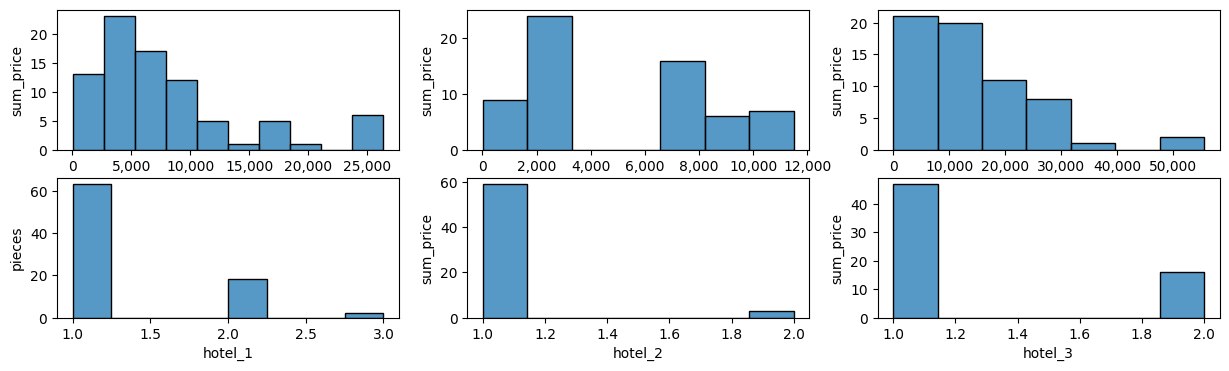

In [34]:
# check the distribution of upsell data by hotels
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,4))
sns.histplot(ax=ax1, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax4, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['pieces']).set(ylabel='pieces', xlabel='hotel_1')
sns.histplot(ax=ax2, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax5, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['pieces']).set(ylabel='sum_price', xlabel='hotel_2')
sns.histplot(ax=ax3, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax6, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['pieces']).set(ylabel='sum_price', xlabel='hotel_3')


ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [35]:
upsell_data.drop(columns=['upsell_type', 'name', 'unit_price'], inplace=True) # keep only the summed upsell price

In [36]:
upsell_data = upsell_data.groupby(by=['hotel_id','search_log_id']).sum().reset_index() # group the upsells for the same booking

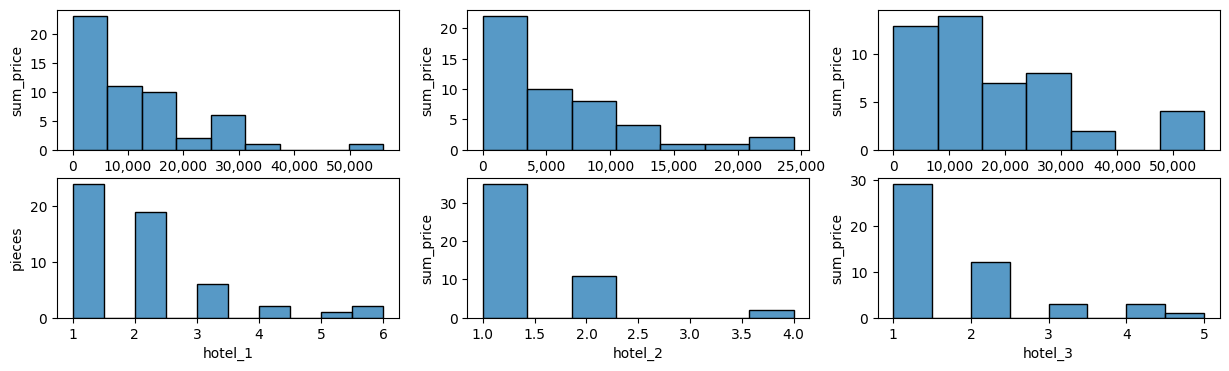

In [37]:
# check the distribution of upsell data for the grouped data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,4))
sns.histplot(ax=ax1, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax4, data=upsell_data[upsell_data['hotel_id']=='hotel_1']['pieces']).set(ylabel='pieces', xlabel='hotel_1')
sns.histplot(ax=ax2, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax5, data=upsell_data[upsell_data['hotel_id']=='hotel_2']['pieces']).set(ylabel='sum_price', xlabel='hotel_2')
sns.histplot(ax=ax3, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['sum_price']).set(ylabel='sum_price')
sns.histplot(ax=ax6, data=upsell_data[upsell_data['hotel_id']=='hotel_3']['pieces']).set(ylabel='sum_price', xlabel='hotel_3')


ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [38]:
# merge 'upsell_data'
#search_log_room_merged = pd.merge(search_log_room_merged, upsell_data, left_on=['hotel_id','search_log_id'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')
merged_df = pd.merge(merged_df, upsell_data, left_on=['hotel_id','search_log_id'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')

In [39]:
# merge with 'booking_data'
#final_df = pd.merge(search_log_room_merged, booking_data, left_on=['hotel_id','search_log_id'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')
final_df = pd.merge(merged_df, booking_data, left_on=['hotel_id','search_log_id'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')

In [40]:
final_df.head()

,search_log_session_id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id,search_log_id,utc_datetime,lang_code,...,ROOMHH_room_price_min,ROOMHH_room_price_max,pieces,sum_price,total_price_final_y,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,4034,1145549807.1726611234,1726611549,NaN,(not set),(not set),hotel_1,112645,2024-09-17 22:19:09,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4037,2039466988.1726611511,1726611615,facebook,cpc,campaign_1,hotel_1,112648,2024-09-17 22:20:15,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4069,1556994523.1726611965,1726612033,google,cpc,NaN,hotel_1,112680,2024-09-17 22:27:13,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4034,1145549807.1726611234,1726611549,NaN,(not set),(not set),hotel_1,112682,2024-09-17 22:28:30,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4102,901475575.1726612653,1726612722,google,cpc,NaN,hotel_1,112714,2024-09-17 22:38:42,en,...,684.25,771.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
final_df.drop(columns='total_price_final_x', inplace=True)

In [42]:
final_df.head()

,search_log_session_id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id,search_log_id,utc_datetime,lang_code,...,ROOMHH_room_price_min,ROOMHH_room_price_max,pieces,sum_price,total_price_final_y,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,4034,1145549807.1726611234,1726611549,NaN,(not set),(not set),hotel_1,112645,2024-09-17 22:19:09,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4037,2039466988.1726611511,1726611615,facebook,cpc,campaign_1,hotel_1,112648,2024-09-17 22:20:15,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4069,1556994523.1726611965,1726612033,google,cpc,NaN,hotel_1,112680,2024-09-17 22:27:13,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4034,1145549807.1726611234,1726611549,NaN,(not set),(not set),hotel_1,112682,2024-09-17 22:28:30,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4102,901475575.1726612653,1726612722,google,cpc,NaN,hotel_1,112714,2024-09-17 22:38:42,en,...,684.25,771.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
final_df['utm_source'].value_counts()

utm_source
google            39988
(direct)           6848
facebook           3329
bing               1215
l.facebook.com      481
                  ...  
source_10             1
source_9              1
teszt22               1
source_13             1
source_15             1
Name: count, Length: 76, dtype: int64

In [44]:
final_df['utm_source'].fillna('na', inplace=True)    #replace nan-s with 'nan'

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_57277/1314503387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['utm_source'].fillna('na', inplace=True)    #replace nan-s with 'nan'


In [45]:
# Define new categories for 'utm_source':

# Define conditions
conditions = [
    final_df['utm_source'].str.contains('facebook'),
    final_df['utm_source'].str.contains('instagram'),
    final_df['utm_source'].str.contains('google'),
    final_df['utm_source'].str.contains('bing'),
    final_df['utm_source'] == 'na'
]

# Define corresponding categories
choices = ['facebook', 'instagram', 'google', 'bing', 'na']

# Create the new category column
final_df['utm_source'] = np.select(conditions, choices, default='other')

<Axes: xlabel='utm_source'>

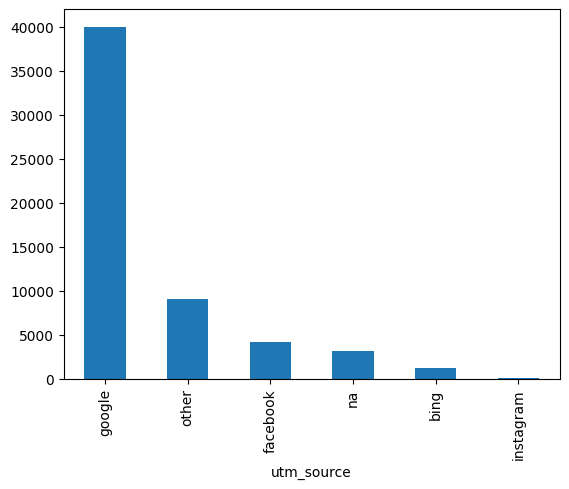

In [46]:
final_df['utm_source'].value_counts().plot(kind='bar')

In [47]:
final_df['utm_medium'].value_counts()

utm_medium
cpc          36314
organic       8578
(none)        6848
(not set)     3224
referral      1973
ct             560
offline        184
email          168
other            9
Name: count, dtype: int64

In [48]:
final_df['utm_medium'].replace('(none)', 'direct', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_57277/2032483116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['utm_medium'].replace('(none)', 'direct', inplace=True)


In [49]:
# for hotel_3, drop the 'teszt' row:
final_df.drop(index = final_df[final_df['utm_medium'] == 'teszt'].index, axis=0, inplace=True)

In [50]:
final_df['utm_campaign'].value_counts()

utm_campaign
(not set)                                  42239
hu_brand                                    5710
campaign_1                                  3369
hu_pmax_brand                               1845
HU                                           546
hirlevel_c6                                  231
campaign_2                                   180
hirlevel_c3                                  137
AT                                           125
campaign_7                                   105
(not+set)                                     82
campaign_10                                   70
proposal-by-phone                             51
campaign_3                                    47
campaign_15                                   38
hirlevel_c1                                   30
loyalty-email                                 28
campaign_33                                   28
campaign_4                                    27
hirlevel_c2                                   23
campaig

In [51]:
final_df['utm_campaign'].fillna('nan', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_57277/4218095515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['utm_campaign'].fillna('nan', inplace=True)


In [52]:
final_df['utm_campaign'].replace({'(not set)':'na'}, inplace=True)
final_df['utm_campaign'].replace({'(not+set)':'na'}, inplace=True)
final_df.loc[final_df['utm_campaign'].str.contains('hirlevel'), 'utm_campaign'] = 'hirlevel_camp'
final_df.loc[final_df['utm_campaign'].str.contains('campaign'), 'utm_campaign'] = 'other_camp'

In [53]:
final_df['utm_campaign'].value_counts()

utm_campaign
na                                         42321
hu_brand                                    5710
other_camp                                  3950
nan                                         2796
hu_pmax_brand                               1845
HU                                           546
hirlevel_camp                                454
AT                                           125
proposal-by-phone                             51
loyalty-email                                 28
CZ                                            11
feliratkozas_hu                               11
HU I PERF I Display I Fagus lombhullÃ¡s        9
teszt                                          1
Name: count, dtype: int64

In [54]:
final_df['utm_medium'].value_counts()

utm_medium
cpc          36314
organic       8578
direct        6848
(not set)     3224
referral      1973
ct             560
offline        184
email          168
other            9
Name: count, dtype: int64

In [55]:
final_df['utm_medium'].fillna('(not set)', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_57277/57436020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['utm_medium'].fillna('(not set)', inplace=True)


## export the final 'search-and-bookings' table

In [56]:
final_df.to_csv('./../data-workfile/search-and-bookings.csv', mode='x')

# Join tables for campaign analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
table_names = ['daily_occupancy', 'website_daily_users', 'daily_ppc_budget', 'datepicker_daily_visitors', 'booking_data','search_log', 'search_log_session']

for k in table_names:
    globals()[k] = pd.DataFrame()
    for x in ['1','2','3']:
        actual_table = pd.read_csv('./../data-clean/hotel_'+x+'/'+k+'.csv', sep=',', encoding='ISO-8859-1', index_col='Unnamed: 0')
        globals()[k] = pd.concat([globals()[k], actual_table])

In [287]:
# unify sources into referral, organic, direct, meta, google, microsoft

<Axes: xlabel='utm_medium'>

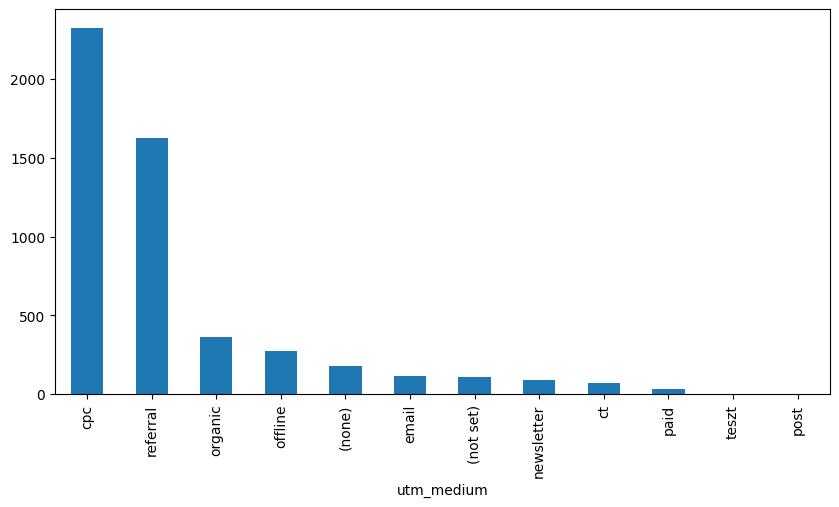

In [8]:
website_daily_users['utm_medium'].value_counts().plot(kind='bar', figsize=(10,5))

In [9]:
# Define new categories for 'utm_medium':
website_daily_users.loc[website_daily_users['utm_medium'].str.contains('email'), 'utm_medium'] = 'newsletter'
website_daily_users.loc[website_daily_users['utm_medium'].str.contains('teszt|paid|post|teszt|ct|offline'), 'utm_medium'] = 'other'
website_daily_users.loc[website_daily_users['utm_medium'].str.contains('none'), 'utm_medium'] = '(not set)'

<Axes: xlabel='utm_medium'>

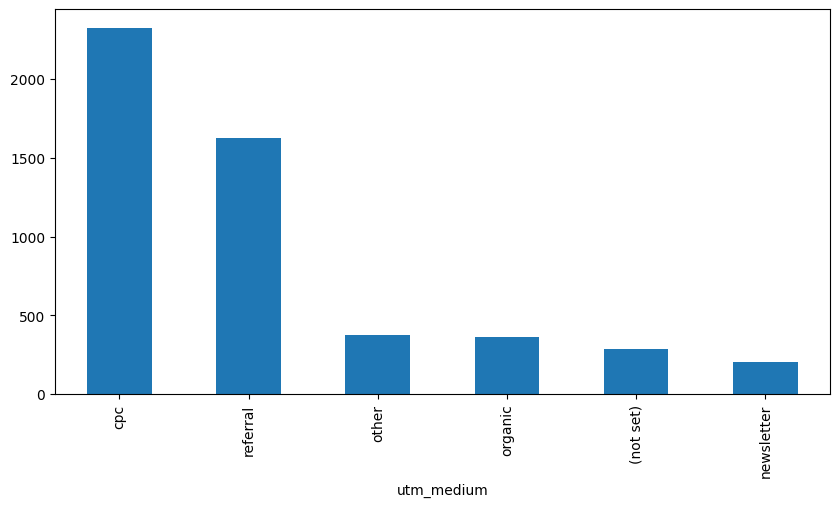

In [10]:
website_daily_users['utm_medium'].value_counts().plot(kind='bar', figsize=(10,5))

<Axes: xlabel='utm_source'>

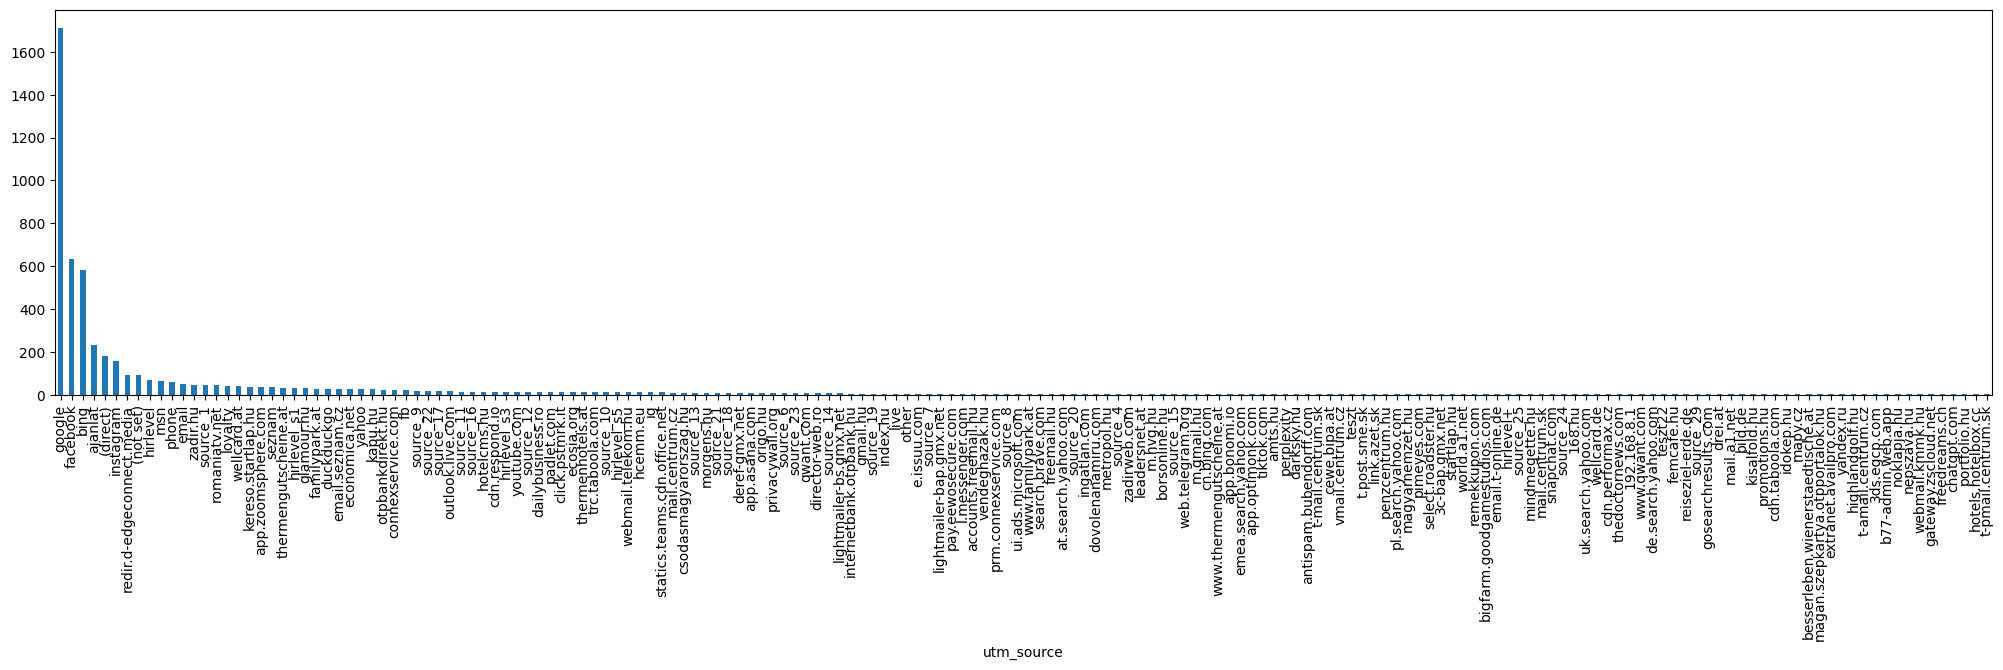

In [11]:
website_daily_users['utm_source'].value_counts().plot(kind='bar', figsize=(25,5))

In [12]:
website_daily_users['utm_source'].unique()

array(['(not set)', '(direct)', 'google', 'facebook', 'msn',
       'redir.d-edgeconnect.media', 'ajanlat', 'source_1', 'bing',
       'seznam', 'email.seznam.cz', 'hotelcms.hu',
       'statics.teams.cdn.office.net', 'world.a1.net', 'source_9', 'live',
       'app.zoomsphere.com', 'connexservice.com', 'source_10',
       'economica.net', 'source_22', 'instagram', 'zadir.hu', 'fb',
       'email', 'phone', 'origo.hu', 'click.pstmrk.it',
       'dailybusiness.ro', 'remekkupon.com', 'ig', 'loyalty',
       'bigfarm.goodgamestudios.com', 'cdn.performax.cz', 'hcemm.eu',
       'source_13', 'romaniatv.net', 'thedoctornews.com', 'source_14',
       'morgens.hu', 'pimeyes.com', 'yahoo', '168.hu', 'source_15',
       'kapu.hu', 'snapchat.com', 'source_16', 'mindmegette.hu',
       'youtube.com', 'source_17', 'trc.taboola.com', 'source_18',
       'source_19', 'outlook.live.com', 'source_21', 'ecosia.org',
       'source_6', 'source_20', 'glamour.hu', 'gmail.hu', 'link.azet.sk',
       'source_

In [13]:
website_daily_users = pd.merge(website_daily_users.reset_index(), website_daily_users[website_daily_users['utm_medium'] =='cpc'][['utm_source','hotel_id']].reset_index(), left_on=['hotel_id','index'], right_on=['hotel_id','index'], how='left', validate='1:1')

In [14]:
website_daily_users

,index,date,utm_source_x,utm_medium,utm_campaign,user_count,session_count,hotel_id,utm_source_y
0,0,2024-09-18,(not set),(not set),(not set),545,690,hotel_1,NaN
1,1,2024-09-18,(direct),(not set),(direct),253,304,hotel_1,NaN
2,2,2024-09-18,google,cpc,(not set),259,273,hotel_1,google
3,3,2024-09-18,google,organic,(organic),144,170,hotel_1,NaN
4,4,2024-09-18,facebook,cpc,campaign_14,125,128,hotel_1,facebook
...,...,...,...,...,...,...,...,...,...
5175,1655,2024-10-18,web.telegram.org,referral,(referral),1,1,hotel_3,NaN
5176,1656,2024-10-18,google,cpc,campaign_33,1,1,hotel_3,google
5177,1657,2024-10-18,hirlevel_s1,newsletter,hirlevel_c1,1,1,hotel_3,NaN
5178,1658,2024-10-18,email,other,proposal-by-phone,1,1,hotel_3,NaN


In [15]:
website_daily_users.rename(columns={'utm_source_y': 'utm_source_cpc'}, inplace=True)

In [16]:
website_daily_users['utm_source_cpc'].value_counts()

utm_source_cpc
google       1468
bing          486
facebook      344
instagram      27
Name: count, dtype: int64

In [17]:
website_daily_users['utm_source_cpc'].fillna('no_cpc', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_36143/1279397645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  website_daily_users['utm_source_cpc'].fillna('no_cpc', inplace=True)


In [18]:
website_daily_users.loc[website_daily_users['utm_source_cpc'].str.contains('facebook|instagram'), 'utm_source_cpc'] = 'meta'
website_daily_users.loc[website_daily_users['utm_source_cpc'].str.contains('bing'), 'utm_source_cpc'] = 'microsoft'

In [19]:
website_daily_users['utm_source_cpc'].value_counts()

utm_source_cpc
no_cpc       2855
google       1468
microsoft     486
meta          371
Name: count, dtype: int64

In [20]:
website_daily_users.rename(columns={'utm_source_x':'utm_source'}, inplace=True)

In [21]:
# Ezt az egyszerusitest esetleg egy kesobbi lepesnel!!!!!!!!!!!!!!!!!!!!!!

# Define new categories for 'utm_source':

# Define conditions
conditions = [
    website_daily_users['utm_source'].str.contains('facebook|instagram|fb|ig|messenger.com'),
    website_daily_users['utm_source'].str.contains('google|youtube|duckduckgo|ecosia'),
    website_daily_users['utm_source'].str.contains('bing|msn|live|outlook|microsoft'),
    website_daily_users['utm_source'].str.contains('direct'),
    website_daily_users['utm_source'].str.contains('not set'),
]

# Define corresponding categories
choices = ['meta', 'google', 'microsoft', 'direct', 'na']

# Create the new category column
website_daily_users['utm_source'] = np.select(conditions, choices, default='other')
#a = np.select(conditions, choices, default='other')

In [22]:
conditions = [
    datepicker_daily_visitors['utm_source'].str.contains('facebook|instagram|fb|ig|messenger.com'),
    datepicker_daily_visitors['utm_source'].str.contains('google|youtube|duckduckgo|ecosia'),
    datepicker_daily_visitors['utm_source'].str.contains('bing|msn|live|outlook|microsoft'),
    datepicker_daily_visitors['utm_source'].str.contains('direct'),
    datepicker_daily_visitors['utm_source'].str.contains('not set'),
]

datepicker_daily_visitors['utm_source'] = np.select(conditions, choices, default='other')

<Axes: xlabel='utm_source'>

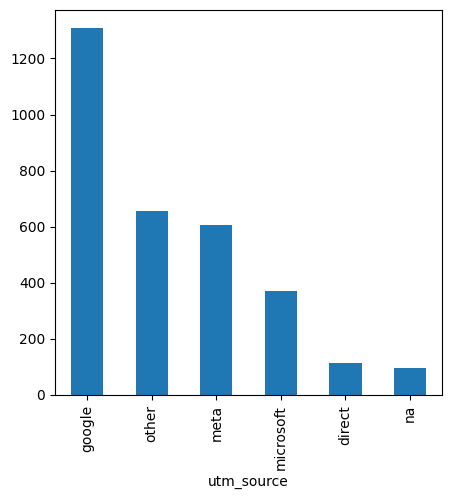

In [23]:
datepicker_daily_visitors['utm_source'].value_counts().plot(kind='bar', figsize=(5,5))

In [24]:
# merge 'website_daily_users' and 'datepicker_daily_visitors' based on 'utm_campaign' and 'date'
visitors_merged = pd.merge(website_daily_users, datepicker_daily_visitors, left_on=['date','hotel_id','utm_campaign','utm_medium','utm_source'], right_on=['date','hotel_id','utm_campaign','utm_medium','utm_source'], how='outer')

# --> where datepicker columns are missing: there was no datepicker guest on that source

In [25]:
visitors_merged['utm_source_cpc'].fillna('no_cpc', inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_36143/3753131814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  visitors_merged['utm_source_cpc'].fillna('no_cpc', inplace=True)


In [26]:
# --> rename the columns in 'visitors_merged'
visitors_merged.rename(columns={'user_count_x':'user_count_website','session_count_x':'session_count_website','user_count_y':'user_count_datepicker','session_count_y':'session_count_datepicker'}, inplace=True)

In [27]:
visitors_merged[['user_count_datepicker','session_count_datepicker']] = visitors_merged[['user_count_datepicker','session_count_datepicker']].fillna(0)

<Axes: xlabel='user_count_website', ylabel='user_count_datepicker'>

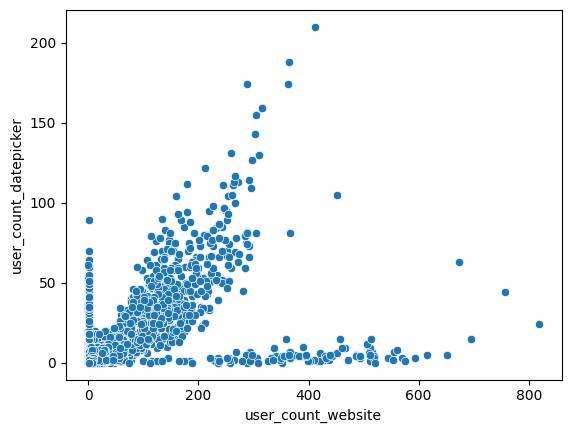

In [28]:
sns.scatterplot(data=visitors_merged, x='user_count_website', y='user_count_datepicker')

In [29]:
visitors_merged[visitors_merged.duplicated(subset=['date','hotel_id','utm_source','utm_medium','utm_campaign'], keep=False)]

,index,date,utm_source,utm_medium,utm_campaign,user_count_website,session_count_website,hotel_id,utm_source_cpc,user_count_datepicker,session_count_datepicker
1,40.0,2024-09-18,direct,(not set),(not set),2.0,3.0,hotel_1,no_cpc,0.0,0.0
2,50.0,2024-09-18,direct,(not set),(not set),1.0,1.0,hotel_1,no_cpc,0.0,0.0
5,41.0,2024-09-18,google,organic,(not set),3.0,3.0,hotel_1,no_cpc,0.0,0.0
6,51.0,2024-09-18,google,organic,(not set),1.0,1.0,hotel_1,no_cpc,0.0,0.0
12,27.0,2024-09-18,google,referral,(referral),8.0,8.0,hotel_1,no_cpc,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10000,1602.0,2024-10-18,other,other,hirlevel_c6,520.0,585.0,hotel_3,no_cpc,0.0,0.0
10001,1626.0,2024-10-18,other,other,hirlevel_c6,6.0,7.0,hotel_3,no_cpc,0.0,0.0
10002,1646.0,2024-10-18,other,other,proposal-by-phone,2.0,2.0,hotel_3,no_cpc,0.0,0.0
10003,1658.0,2024-10-18,other,other,proposal-by-phone,1.0,1.0,hotel_3,no_cpc,0.0,0.0


In [30]:
# merge and sum the duplicates

visitors_merged_grouped = visitors_merged.groupby(by=['hotel_id','date','utm_source','utm_medium','utm_campaign']).sum()

In [31]:
visitors_merged_grouped.reset_index(inplace=True)

<Axes: xlabel='user_count_website', ylabel='user_count_datepicker'>

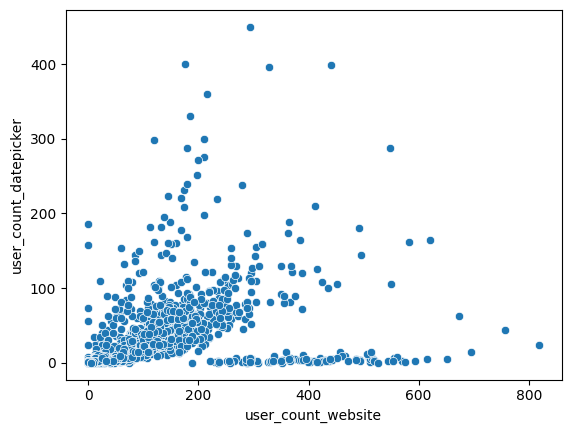

In [32]:
sns.scatterplot(data=visitors_merged_grouped, x='user_count_website', y='user_count_datepicker')

In [33]:
visitors_merged_grouped['utm_source_cpc'].str.contains('no_cpc')

0        True
1        True
2       False
3       False
4       False
        ...  
3889     True
3890     True
3891     True
3892     True
3893     True
Name: utm_source_cpc, Length: 3894, dtype: bool

In [34]:
visitors_merged_grouped.loc[visitors_merged_grouped['utm_source_cpc'].str.contains('no_cpc'), 'utm_source_cpc'] = 'no_cpc'

In [35]:
visitors_merged_grouped.loc[visitors_merged_grouped['utm_source_cpc'].str.contains('google'), 'utm_source_cpc'] = 'google'
visitors_merged_grouped.loc[visitors_merged_grouped['utm_source_cpc'].str.contains('meta'), 'utm_source_cpc'] = 'meta'

## Export the final df for campaign analysis

In [36]:
# --> clean, and export the table

visitors_merged_grouped.to_csv('./../data-workfile/campaign_performance.csv', mode='x')

FileExistsError: [Errno 17] File exists: './../data-workfile/campaign_performance.csv'

# PPC analysis

In [37]:
from datetime import datetime

In [38]:
visitors_merged_grouped

,hotel_id,date,utm_source,utm_medium,utm_campaign,index,user_count_website,session_count_website,utm_source_cpc,user_count_datepicker,session_count_datepicker
0,hotel_1,2024-09-18,direct,(not set),(direct),1.0,253.0,304.0,no_cpc,104.0,124.0
1,hotel_1,2024-09-18,direct,(not set),(not set),90.0,3.0,4.0,no_cpc,0.0,0.0
2,hotel_1,2024-09-18,google,cpc,(not set),2.0,259.0,273.0,google,59.0,59.0
3,hotel_1,2024-09-18,google,cpc,(organic),14.0,17.0,21.0,google,6.0,6.0
4,hotel_1,2024-09-18,google,cpc,campaign_15,6.0,99.0,105.0,google,18.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
3889,hotel_3,2024-10-18,other,other,campaign_10,1624.0,9.0,9.0,no_cpc,0.0,0.0
3890,hotel_3,2024-10-18,other,other,hirlevel_c5,1630.0,5.0,5.0,no_cpc,0.0,0.0
3891,hotel_3,2024-10-18,other,other,hirlevel_c6,3228.0,526.0,592.0,no_cpc,0.0,0.0
3892,hotel_3,2024-10-18,other,other,proposal-by-phone,4963.0,4.0,4.0,no_cpc,0.0,0.0


In [39]:
# create a new long to wide from 'visitors_merged' and 'daily_ppc_budget'
# then remove the unnecessary columns

ppc = visitors_merged_grouped[visitors_merged_grouped['utm_medium'] == 'cpc'][['hotel_id', 'date', 'utm_source_cpc', 'user_count_website','user_count_datepicker']]

In [40]:
ppc

,hotel_id,date,utm_source_cpc,user_count_website,user_count_datepicker
2,hotel_1,2024-09-18,google,259.0,59.0
3,hotel_1,2024-09-18,google,17.0,6.0
4,hotel_1,2024-09-18,google,99.0,18.0
5,hotel_1,2024-09-18,google,67.0,23.0
6,hotel_1,2024-09-18,google,54.0,5.0
...,...,...,...,...,...
3874,hotel_3,2024-10-18,meta,28.0,8.0
3875,hotel_3,2024-10-18,meta,24.0,6.0
3877,hotel_3,2024-10-18,microsoft,2.0,0.0
3878,hotel_3,2024-10-18,microsoft,11.0,3.0


In [41]:
ppc = ppc.groupby(by=['hotel_id','date','utm_source_cpc']).sum().reset_index()

In [42]:
ppc = ppc.pivot(index=['hotel_id','date'], columns='utm_source_cpc', values=['user_count_website','user_count_datepicker']).reset_index()

In [43]:
ppc.columns = [(str(col[1])+'_'+col[0]) for col in ppc.columns]
ppc.head()

,_hotel_id,_date,google_user_count_website,meta_user_count_website,microsoft_user_count_website,google_user_count_datepicker,meta_user_count_datepicker,microsoft_user_count_datepicker
0,hotel_1,2024-09-18,718.0,165.0,21.0,175.0,27.0,5.0
1,hotel_1,2024-09-19,684.0,153.0,28.0,150.0,29.0,5.0
2,hotel_1,2024-09-20,690.0,159.0,25.0,144.0,29.0,10.0
3,hotel_1,2024-09-21,638.0,172.0,27.0,146.0,22.0,1.0
4,hotel_1,2024-09-22,725.0,267.0,20.0,197.0,38.0,5.0


In [44]:
# concat with 'daily_ppc_budget'

ppc_df = pd.merge(daily_ppc_budget, ppc, left_on=['hotel_id', 'date'], right_on=['_hotel_id', '_date'], how='outer', validate='1:1')

In [45]:
ppc_df.drop(columns=['_hotel_id','_date'], inplace=True)

In [46]:
# add number of bookings per day

# --> prepare the 'booking_data' table for merging, grouped by each day

    # merge 'search_log_session' and 'search_log'
merged_booking_df = pd.merge(search_log_session, search_log, left_on=['hotel_id', 'id'], right_on=['hotel_id', 'search_log_session_id'], how='right', validate='1:m')

    # merge with 'booking_data'
merged_booking_df = pd.merge(merged_booking_df, booking_data, left_on=['hotel_id','id_y'], right_on=['hotel_id','search_log_id'], how='left', validate='1:1')

# drop the unnecessary columns
merged_booking_df.drop(columns=['id_x','id_y','uuid','utm_source','session_id','search_log_session_id','arrival','departure','search_log_id','total_price_final_y','lang_code','utm_medium', 'utm_campaign'], inplace=True)

# convert utc_datetime to YYYY-MM-DD

merged_booking_df['utc_datetime'] = pd.to_datetime(merged_booking_df['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [47]:
# Scrape down the EUR exchange rate data from MNB's webpage

import requests
from bs4 import BeautifulSoup

# Define the URL
url = 'https://www.mnb.hu/arfolyam-tablazat?deviza=rbCurrencyActual&devizaSelected=EUR&datefrom=2024.09.18.&datetill=2024.10.18.&order=1'

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table') 

# rows into a table
table_data = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    table_data.append([cell.get_text(strip=True) for cell in cells])

eur_price = pd.DataFrame(table_data[1:], columns=table_data[0])  # first row to header

eur_price = eur_price.drop(index=[0,1]).reset_index()

eur_price = eur_price.rename(columns={'':'date'})[['date','EUR']]

In [48]:
# dates to YYYY-MM-DD format

hungarian_to_english = {
    'január': 'January', 'február': 'February', 'március': 'March', 'április': 'April',
    'május': 'May', 'június': 'June', 'július': 'July', 'augusztus': 'August',
    'szeptember': 'September', 'október': 'October', 'november': 'November', 'december': 'December',
    'hétfő': 'Monday', 'kedd': 'Tuesday', 'szerda': 'Wednesday', 'csütörtök': 'Thursday',
    'péntek': 'Friday', 'szombat': 'Saturday', 'vasárnap': 'Sunday'
}

def convert_hungarian_date(date_str):
    for hun, eng in hungarian_to_english.items():
        date_str = date_str.replace(hun, eng)
    date_obj = datetime.strptime(date_str, '%Y. %B %d., %A')
    return date_obj.strftime('%Y-%m-%d')

# apply the function to the df column
eur_price['date'] = eur_price['date'].apply(convert_hungarian_date)


In [49]:
eur_price['date'] = pd.to_datetime(eur_price['date'])

In [50]:
# Convert date column to datetime and value column to numeric
eur_price.set_index('date', inplace=True)

# Create a complete date range from the first to the last date
date_range = pd.date_range(start=eur_price.index.min(), end=eur_price.index.max(), freq='D')

# Reindex the DataFrame to include all dates in the range
eur_price = eur_price.reindex(date_range)

In [51]:
eur_price['EUR'] = eur_price['EUR'].fillna(method='ffill')

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_36143/2358788950.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eur_price['EUR'] = eur_price['EUR'].fillna(method='ffill')


In [52]:
def conversion(x):
    rate = eur_price[eur_price.index == x]['EUR'].values
    if rate:
        return float(rate[0].replace(',', '.')) 
    else:
        return None

In [53]:
# Set the default conversion rate to 1
merged_booking_df['conversion_rate'] = 1

# Update 'conversion_rate' only where 'currency' is 'EUR'
merged_booking_df.loc[merged_booking_df['currency'] == 'EUR', 'conversion_rate'] = merged_booking_df.loc[merged_booking_df['currency'] == 'EUR', 'utc_datetime'].apply(conversion)


/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_36143/2415408803.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if rate:
/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_36143/3791677558.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[   nan    nan 394.47 ... 400.05 400.05 400.05]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_booking_df.loc[merged_booking_df['currency'] == 'EUR', 'conversion_rate'] = merged_booking_df.loc[merged_booking_df['currency'] == 'EUR', 'utc_datetime'].apply(conversion)


In [54]:
merged_booking_df['conversion_rate'].fillna(1, inplace=True)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_36143/121650537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_booking_df['conversion_rate'].fillna(1, inplace=True)


In [55]:
merged_booking_df['total_price_final_x'] = merged_booking_df['total_price_final_x']*merged_booking_df['conversion_rate']
merged_booking_df['rooms_total_price'] = merged_booking_df['rooms_total_price']*merged_booking_df['conversion_rate']
merged_booking_df['upsell_total_price'] = merged_booking_df['upsell_total_price']*merged_booking_df['conversion_rate']
merged_booking_df['vouchers_total_price'] = merged_booking_df['vouchers_total_price']*merged_booking_df['conversion_rate']
merged_booking_df['loyalty_discount_total'] = merged_booking_df['loyalty_discount_total']*merged_booking_df['conversion_rate']
merged_booking_df['redeemed_loyalty_points_total'] = merged_booking_df['redeemed_loyalty_points_total']*merged_booking_df['conversion_rate']

In [56]:
# drop 'currency'
merged_booking_df.drop(columns=['currency','conversion_rate'], inplace=True)

In [57]:
merged_booking_df.rename(columns={'total_price_final_x':'total_price_final'}, inplace=True)

In [58]:
merged_booking_df = merged_booking_df.groupby(by=['hotel_id', 'utc_datetime']).mean().reset_index()

In [59]:
ppc_df = pd.merge(ppc_df, merged_booking_df, left_on=['hotel_id', 'date'], right_on=['hotel_id', 'utc_datetime'], how='left', validate='1:1')

In [499]:
ppc_df

,date,daily_google_spend,daily_microsoft_spend,daily_meta_spend,hotel_id,google_user_count_website,meta_user_count_website,microsoft_user_count_website,google_user_count_datepicker,meta_user_count_datepicker,...,nights,adults,children,conversion,total_price_final,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,2024-09-18,128044,10564,35950,hotel_1,718.0,165.0,21.0,175.0,27.0,...,3.0,2.0,0.0,0.0,0.0,248121.6300,0.0,0.0,27515.2900,5000.000
1,2024-09-19,137322,12048,53112,hotel_1,684.0,153.0,28.0,150.0,29.0,...,2.0,2.0,0.0,0.0,0.0,222477.2200,0.0,0.0,21267.0000,2466.875
2,2024-09-20,124825,8484,61717,hotel_1,690.0,159.0,25.0,144.0,29.0,...,2.0,2.0,0.0,0.0,0.0,205020.0000,0.0,0.0,21265.5088,0.000
3,2024-09-21,106588,6976,64140,hotel_1,638.0,172.0,27.0,146.0,22.0,...,2.0,2.0,0.0,0.0,0.0,195902.3500,0.0,0.0,18849.5600,0.000
4,2024-09-22,144448,6684,73310,hotel_1,725.0,267.0,20.0,197.0,38.0,...,3.0,2.0,0.0,0.0,0.0,185664.8200,0.0,0.0,18566.4820,4929.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2024-10-14,126691,10516,39681,hotel_3,754.0,103.0,39.0,254.0,27.0,...,2.0,2.0,0.0,0.0,0.0,157420.0000,0.0,0.0,12852.0000,5000.000
89,2024-10-15,118527,11636,49422,hotel_3,667.0,103.0,35.0,215.0,16.0,...,2.0,2.0,0.0,0.0,0.0,162577.3350,0.0,0.0,14460.4450,5000.000
90,2024-10-16,107786,7332,54621,hotel_3,626.0,119.0,30.0,186.0,17.0,...,2.0,2.0,0.0,0.0,0.0,214132.2707,0.0,0.0,21446.6745,5000.000
91,2024-10-17,108032,9220,61796,hotel_3,714.0,106.0,27.0,193.0,21.0,...,2.0,2.0,0.0,0.0,0.0,206147.1900,0.0,0.0,12668.3900,0.000


In [60]:
ppc_df.drop(columns='utc_datetime', inplace=True)

## Export the cleaned file

In [61]:
ppc_df.to_csv('./../data-workfile/ppc_performance.csv', mode='x')

# Daily Occupancy

In [2]:
table_names = ['daily_occupancy']

for k in table_names:
    globals()[k] = pd.DataFrame()
    for x in ['1','2','3']:
        actual_table = pd.read_csv('./../data-clean/hotel_'+x+'/'+k+'.csv', sep=',', encoding='ISO-8859-1', index_col='Unnamed: 0')
        globals()[k] = pd.concat([globals()[k], actual_table])

In [3]:
daily_occupancy.head()

,recording_date,subject_date,fill_rate,hotel_id
0,2024-09-18,2024-09-18,67.368,hotel_1
1,2024-09-18,2024-09-19,65.789,hotel_1
2,2024-09-18,2024-09-20,67.895,hotel_1
3,2024-09-18,2024-09-21,59.474,hotel_1
4,2024-09-18,2024-09-22,43.684,hotel_1


In [4]:
daily_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32364 entries, 0 to 10787
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recording_date  32364 non-null  object 
 1   subject_date    32364 non-null  object 
 2   fill_rate       32364 non-null  float64
 3   hotel_id        32364 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
daily_occupancy.describe()

,fill_rate
count,32364.000000
mean,21.729028
std,27.935624
min,0.000000
25%,0.526000
50%,4.800000
75%,37.719000
max,100.000000


In [6]:
# convert to datetime
daily_occupancy['recording_date'] = pd.to_datetime(daily_occupancy['recording_date'])
daily_occupancy['subject_date'] = pd.to_datetime(daily_occupancy['subject_date'])

In [7]:
# days unit stay
daily_occupancy['days_until_stay'] = (daily_occupancy['subject_date'] - daily_occupancy['recording_date']).dt.days

In [9]:
# extract day of the week, and weekend
daily_occupancy['subject_day_of_week'] = daily_occupancy['subject_date'].dt.dayofweek
daily_occupancy['subject_is_weekend'] = daily_occupancy['subject_day_of_week'].isin([5, 6]).astype(int)


In [10]:
daily_occupancy

,recording_date,subject_date,fill_rate,hotel_id,days_until_stay,stay_day_of_week,subject_day_of_week,subject_is_weekend
0,2024-09-18,2024-09-18,67.368,hotel_1,0,2,2,0
1,2024-09-18,2024-09-19,65.789,hotel_1,1,3,3,0
2,2024-09-18,2024-09-20,67.895,hotel_1,2,4,4,0
3,2024-09-18,2024-09-21,59.474,hotel_1,3,5,5,1
4,2024-09-18,2024-09-22,43.684,hotel_1,4,6,6,1
...,...,...,...,...,...,...,...,...
10783,2024-10-18,2025-08-27,2.632,hotel_3,313,2,2,0
10784,2024-10-18,2025-08-28,2.632,hotel_3,314,3,3,0
10785,2024-10-18,2025-08-29,0.000,hotel_3,315,4,4,0
10786,2024-10-18,2025-08-30,0.000,hotel_3,316,5,5,1


## Export the cleaned file

In [11]:
daily_occupancy.to_csv('./../data-workfile/daily_occupancy.csv', mode='x')